# Name:Mohammed Ashraf

# Company:Oasis Infobyte

# Project:SALES PREDICTION

In [1]:
#for data preprocessing
import pandas as pd
import numpy as np
#for data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
#for linear Regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#for scaling data
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [3]:
#loading_data
df = pd.read_csv('Advertising.csv')

# Task:
Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.


Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.


# Description:

1-TV: This column represents the advertising budget or spending on television advertising. Television advertising is a common medium for reaching a broad audience with visual and audio messages.

2-Radio: This column represents the advertising budget or spending on radio advertising. Radio advertising is a medium that conveys messages through audio broadcasts and is effective for reaching a local or specific demographic audience.

3-Newspaper: This column represents the advertising budget or spending on newspaper advertising. Newspaper advertising involves placing advertisements in print publications and can be effective for reaching specific geographic or demographic segments.

4-Sales: This column is the target variable or dependent variable, representing the sales performance of a product. The goal of the analysis might be to understand how variations in TV, radio, and newspaper advertising spending influence product sales.


In [4]:
#Reading first Rows of data  
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
#seeing the last Rows of data 
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
#size of data
df.size

1000

In [7]:
#shape of data
df.shape

(200, 5)

In [8]:
#exploring data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
#the description of data
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
#seeing the types of the columns
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [11]:
#seeing the columns of the data
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [12]:
#seeing data 
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Data preprocessing

In [13]:
#droping the column Unnamed: 0 because there is no useful from it
df.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
#cheching data after dropping column
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [15]:
#checking data if have a duplicated values
#there is no duplicated values
df.duplicated().sum()

0

In [16]:
#checking data if have null values
#there is no null values in the data 
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

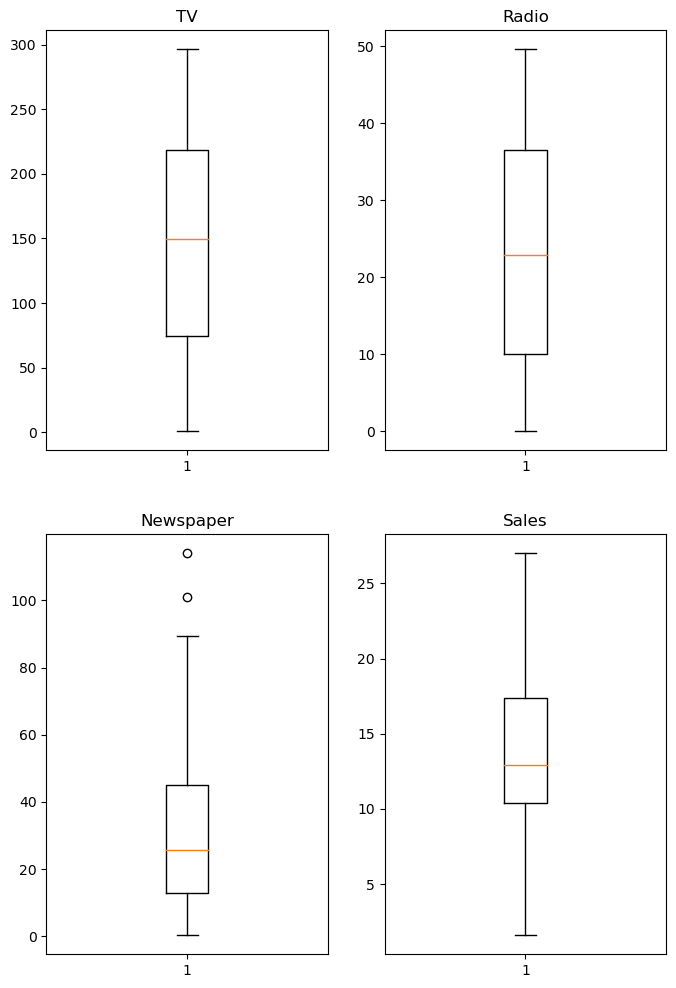

In [17]:
#visualizatoin to see the outliers

fig, ax = plt.subplots(2, 2, figsize=(8, 12))

# Boxplot for TV
ax[0, 0].boxplot(x=df[['TV']])
ax[0, 0].set_title('TV')

# Boxplot for Radio
ax[0, 1].boxplot(x=df[['Radio']])
ax[0, 1].set_title('Radio')

# Boxplot for Newspaper
ax[1, 0].boxplot(x=df[['Newspaper']])
ax[1, 0].set_title('Newspaper')

# Boxplot for Sales
ax[1, 1].boxplot(x=df[['Sales']])
ax[1, 1].set_title('Sales')

plt.show()

In [18]:
#Q1 and Q3 calculations, and the interquartile range (IQR) for the 'Newspaper'
Q1_Newspaper=df['Newspaper'].quantile(0.25)
Q3_Newspaper=df['Newspaper'].quantile(0.75)
IQR_Newspaper=Q3_Newspaper - Q1_Newspaper
print(IQR_Newspaper)

32.35


In [19]:
df = df [~((df['Newspaper']<(Q1_Newspaper-1.5*IQR_Newspaper))|(df['Newspaper']>(Q3_Newspaper+1.5*IQR_Newspaper)))]

<Axes: xlabel='Newspaper'>

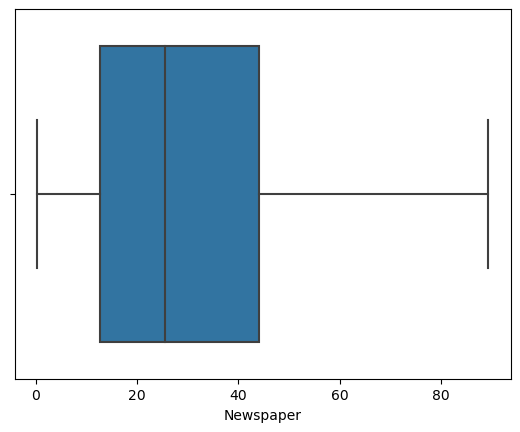

In [20]:
#let's visualize after detecting outliers in Newspaper
sns.boxplot(x='Newspaper', data=df)

# Data visualization

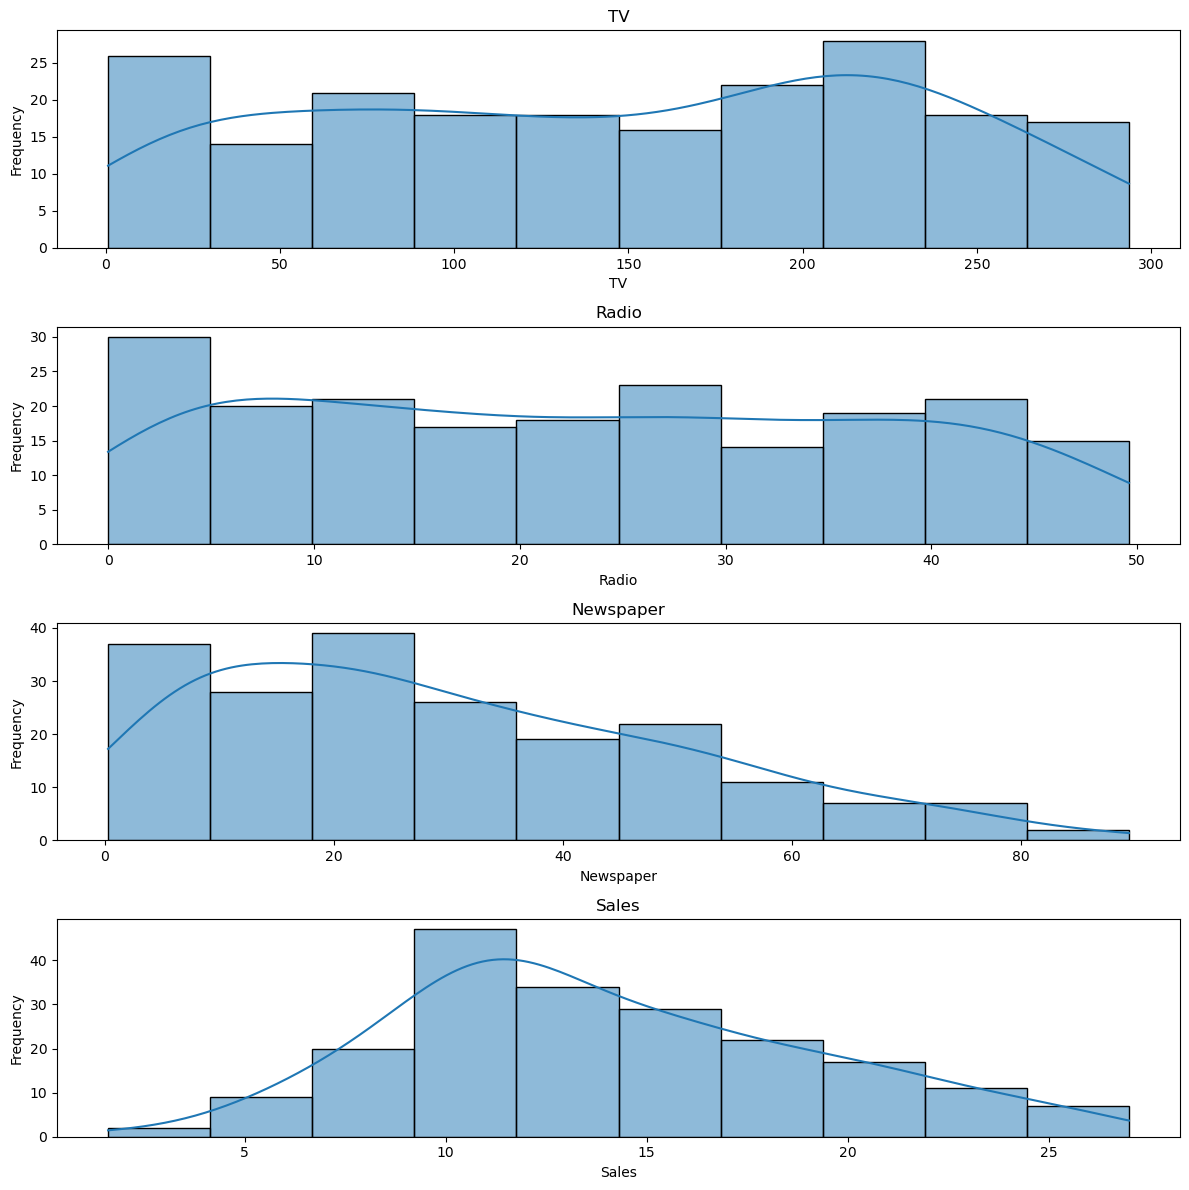

In [21]:
# Distribution of 'TV'&'Radio'&'Newspaper'&'Sales'
col= ['TV', 'Radio', 'Newspaper','Sales']

plt.figure(figsize=(12, 12))
for i, feature in enumerate(col, 1):
    plt.subplot(4, 1, i)
    sns.histplot(data=df[feature], bins=10, kde=True)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')   
plt.tight_layout()
plt.show()

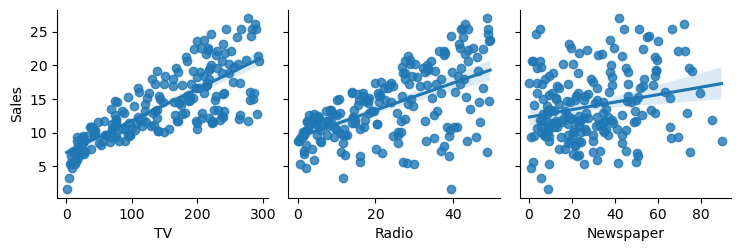

In [22]:
# Scatter plots to check the linearity assumption between each independent variable (TV, Radio, Newspaper) and the dependent variable (Sales)

sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")

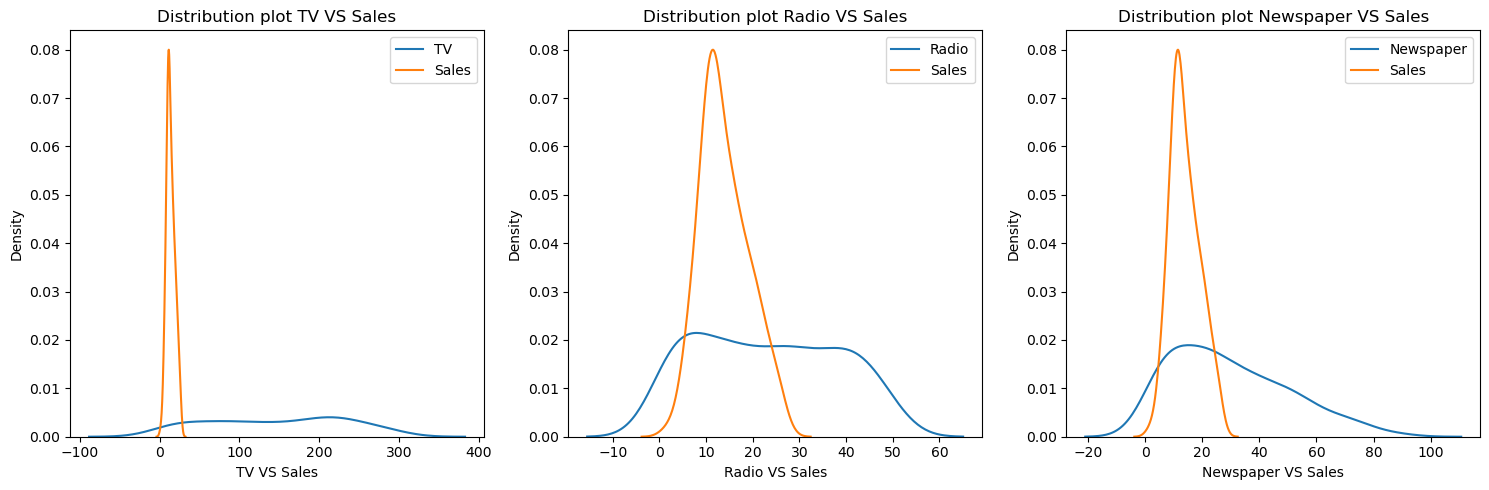

In [23]:
# subplots that visual comparison across the three advertising channels, aiding in understanding their relative impact on sales.
plt.figure(figsize=(15, 5))

col = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in col.items():
    plt.subplot(1, 3, plot + 1)
    sns.distplot(x=df[col_name],hist=False, label= col_name)
    sns.distplot(x=df["Sales"],hist = False,label= "Sales")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Distribution plot {} VS Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()

# building linear_Regression model

In [24]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [25]:
# Split the data into features (X) and target variable (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 2.74
R-squared: 0.90


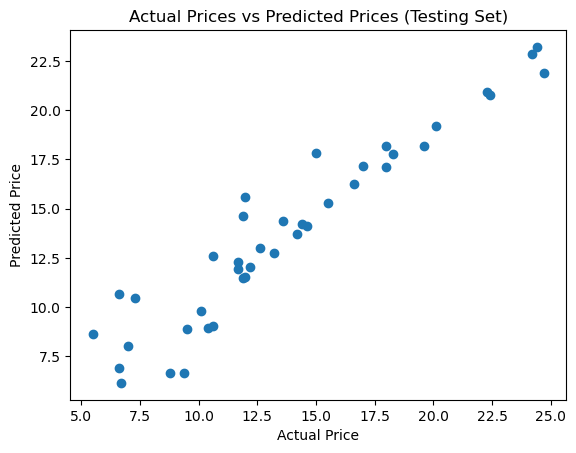

In [27]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices (Testing Set)")
plt.show()

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 2.74
R-squared: 0.90


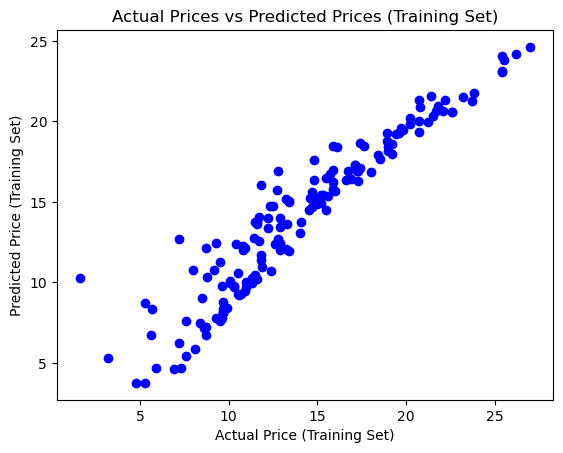

In [29]:
# Scatter plot for the training set
plt.scatter(y_train, y_train_pred, color='blue', marker='o')
plt.xlabel("Actual Price (Training Set)")
plt.ylabel("Predicted Price (Training Set)")
plt.title("Actual Prices vs Predicted Prices (Training Set)")
plt.show()

In [30]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
66,9.5,8.902563,0.597437
116,12.2,12.013069,0.186931
17,24.4,23.211445,1.188555
143,10.4,8.923951,1.476049
158,7.3,10.467307,-3.167307
128,24.7,21.897197,2.802803
142,20.1,19.199426,0.900574
31,11.9,11.454526,0.445474
19,14.6,14.097614,0.502386
169,15.0,17.804099,-2.804099


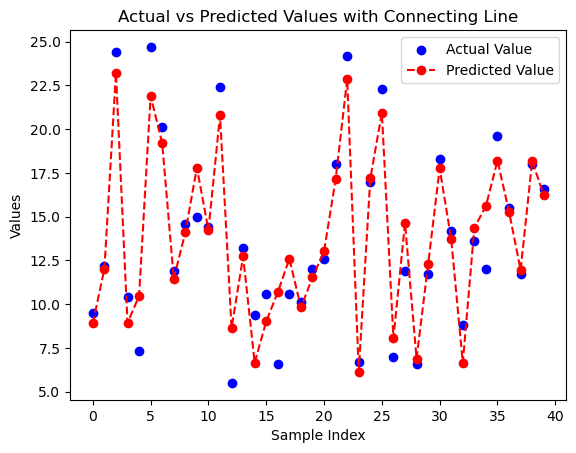

In [31]:
# Scatter plot with a line connecting the points
plt.scatter(range(len(y_test)), y_test, label='Actual Value', color='blue', marker='o')
plt.plot(range(len(y_test)), y_pred, label='Predicted Value', color='red', marker='o', linestyle='dashed')
plt.xlabel("Sample Index")
plt.ylabel("Values")
plt.title("Actual vs Predicted Values with Connecting Line")
plt.legend()
plt.show()

# applying my model

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Input values from the user for new data
tv = float(input("Enter the TV value: "))
radio = float(input("Enter the Radio value: "))
news = float(input("Enter the Newspaper value:"))

# Create a DataFrame for new data
new_data = pd.DataFrame({
    "TV": [tv],
    "Radio": [radio],
    "Newspaper": [news]
})

# Make predictions on the new data using the trained model
new_pred = model.predict(new_data)
# Display the results
print("-------------------------------------")
print("Predicted Sales : {}".format(abs(new_pred)))

Enter the TV value: 230.1
Enter the Radio value: 37.8
Enter the Newspaper value:69.2
-------------------------------------
Predicted Sales : [20.6304725]


In [33]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Thanks Oasis infobyte